In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('mote_locs.txt',sep=' ')

In [6]:
loc_array =df.to_numpy()

In [7]:
loc_array.T[2]

array([23., 20., 19., 15., 12., 12.,  8.,  4.,  2.,  5.,  3.,  1.,  5.,
        6.,  3.,  2.,  8., 10., 13., 17., 18., 23., 24., 30., 30., 31.,
       26., 31., 26., 31., 28., 31., 26., 30., 27., 31., 26., 31., 26.,
       28., 30., 30., 24., 22., 19., 16., 14., 10.,  6.,  1.,  4.,  6.,
        5.,  2.])

In [10]:
import matplotlib.pyplot as plt
from matplotlib import transforms

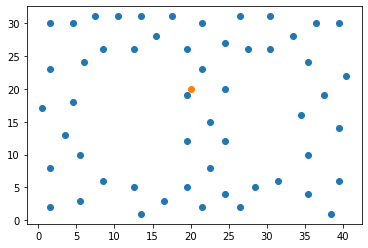

In [20]:
plt.scatter(loc_array.T[1],loc_array.T[2])
plt.scatter(20,20)

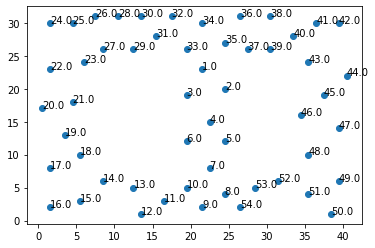

In [27]:
fig,ax = plt.subplots()
ax.plot(loc_array.T[1],loc_array.T[2],ls="",marker="o")
for xi,yi,idi in zip(loc_array.T[1],loc_array.T[2],loc_array.T[0]):
    ax.annotate(str(idi),xy=(xi,yi))

In [29]:
x = loc_array.T[1]
y = loc_array.T[2]
ids = loc_array.T[0]

In [25]:
x_max = np.max(loc_array.T[1])
x_min = np.min(loc_array.T[1])
y_max = np.max(loc_array.T[2])
y_min = np.min(loc_array.T[2])
print(x_max,x_min)
print(y_max,y_min)

40.5 0.5
31.0 1.0


In [34]:
new_x = -x+x_min+x_max
new_y = -y+y_min+y_max

In [42]:
num = 10
y_locs = np.linspace(y_min,y_max,num)
x_locs = np.linspace(x_min,x_max,num)

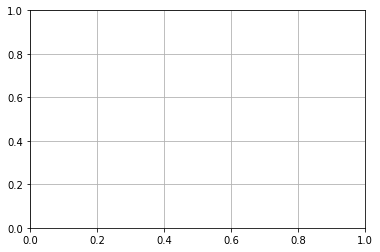

In [53]:
plt.grid()

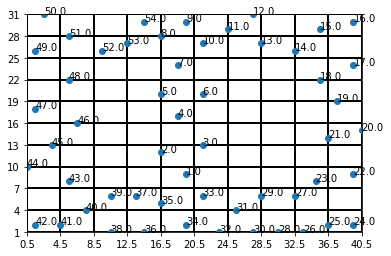

In [90]:
fig,ax = plt.subplots()

ax.set_xticks(np.linspace(x_min,x_max,11))
ax.set_yticks(np.linspace(y_min,y_max,11))
ax.axis(xmin=x_min,xmax=x_max,ymin=y_min,ymax=y_max)
# ax.set_xticks(np.arange(x_min,x_max,4))
# ax.grid(axis='both')
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.plot(new_x,new_y,ls="",marker="o")
for xi,yi,idi in zip(new_x,new_y,loc_array.T[0]):
    ax.annotate(str(idi),xy=(xi,yi))

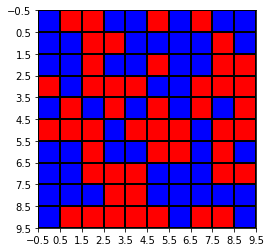

In [83]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

data = np.random.rand(10, 10) * 20

# create discrete colormap
cmap = colors.ListedColormap(['red', 'blue'])
bounds = [0,10,20]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
ax.imshow(data, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(-.5, 10, 1));
ax.set_yticks(np.arange(-.5, 10, 1));
# ax.set_xticks(np.arange(0,10,1))
# ax.set_yticks(np.arange(0,10,1))


plt.show()

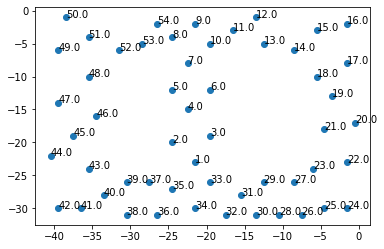

In [30]:
fig,ax = plt.subplots()
ax.plot(-loc_array.T[1],-loc_array.T[2],ls="",marker="o")
for xi,yi,idi in zip(loc_array.T[1],loc_array.T[2],loc_array.T[0]):
    ax.annotate(str(idi),xy=(-xi,-yi))

In [11]:
rot = transforms.Affine2D().rotate_deg(90)

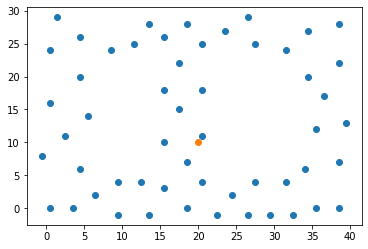

In [22]:
plt.scatter(-loc_array.T[1]+40,-loc_array.T[2]+30)
plt.scatter(20,10)